In [2]:
import chess.pgn
import io
from typing import List
from chess.pgn import Game
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [2]:
!jupyter kernelspec list

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Available kernels:
  python3    /opt/homebrew/lib/python3.11/site-packages/ipykernel/resources
  rust       /Users/nuno/Library/Jupyter/kernels/rust


In [3]:
import sys
print(sys.executable)

/opt/homebrew/opt/python@3.11/bin/python3.11


In [3]:
!ls

dataset_inspect.ipynb intro.ipynb


In [9]:
import sys
sys.path.append('../gamma.dylib')

import gamma

ModuleNotFoundError: No module named 'gamma'

In [9]:
def load_first_chunk_of_pgn(file_path, chunk_size) -> List[Game]:
    """
    Loads the first chunk of games from a PGN file.
    
    :param file_path: Path to the PGN file.
    :param chunk_size: Number of games to load in the chunk.
    :return: List of games in the first chunk.
    """
    games: List[Game] = []
    with open(file_path) as pgn_file:
        for _ in range(chunk_size):
            try:
                game = chess.pgn.read_game(pgn_file)
                if game is None:  # End of file
                    break
                games.append(game)
            except Exception as e:
                print(f"Error reading game: {e}")
                continue
    return games

In [10]:
# Define your file path and chunk size
pgn_file_path = "../dataset/lichess_db_standard_rated_2016-05.pgn"
chunk_size = 100  # for example, load the first 100 games

# Load the first chunk
first_chunk = load_first_chunk_of_pgn(pgn_file_path, chunk_size)
print(f"Loaded {len(first_chunk)} games in the first chunk")


Loaded 100 games in the first chunk


In [11]:
game = first_chunk[0]

In [12]:
vars(game.headers)

{'_tag_roster': {'Event': 'Rated Bullet tournament https://lichess.org/tournament/IaRkDsvp',
  'Site': 'https://lichess.org/r0cYFhsy',
  'Date': '????.??.??',
  'Round': '?',
  'White': 'GreatGig',
  'Black': 'hackattack',
  'Result': '0-1'},
 '_others': {'UTCDate': '2016.04.30',
  'UTCTime': '22:00:03',
  'WhiteElo': '1777',
  'BlackElo': '1809',
  'WhiteRatingDiff': '-11',
  'BlackRatingDiff': '+11',
  'ECO': 'B01',
  'Opening': 'Scandinavian Defense: Mieses-Kotroc Variation',
  'TimeControl': '60+0',
  'Termination': 'Time forfeit'}}

In [13]:
vars(game.mainline_moves())

{'start': <Game at 0x148d34510 ('GreatGig' vs. 'hackattack', '????.??.??' at 'https://lichess.org/r0cYFhsy')>,
 'f': <function chess.pgn.GameNode.mainline_moves.<locals>.<lambda>(node)>}

In [14]:
moves = [move.uci() for move in game.mainline_moves()]
print("Moveas:", " ".join(moves))


Moveas: e2e4 d7d5 e4d5 d8d5 b1c3 d5d8 d2d4 g8f6 g1f3 c8g4 h2h3 g4f3 g2f3 c7c6 f1g2 b8d7 c1e3 e7e6 d1d2 f6d5 c3d5 c6d5 e1c1 f8e7 c2c3 d8c7 c1b1 e8c8 f3f4 c8b8 h1g1 b8a8 g2h1 g7g6 h3h4 e7h4 f2f3 h4e7 d2c2 d7f6 h1g2 f6h5 g2h3 h5f4 e3f4 c7f4 d1f1 f4d6 g1g4 d8f8 f1g1 f7f5 g4g2 e7f6 g2g3 f8g8 h3f1 g8g7 f1d3 h8g8 c2h2 d6b8 h2g2 b8c8 f3f4 c8c6 g2f2 f6h4 g3g6 h4f2 g6g7 g8g7 g1g7 a7a6 g7g8 a8a7 g8h8 c6d7 h8h7 d7h7


In [ ]:
game.headers["Result"]

In [ ]:
moves = [move.uci() for move in game.mainline_moves()]
print("Moveas:", " ".join(moves))

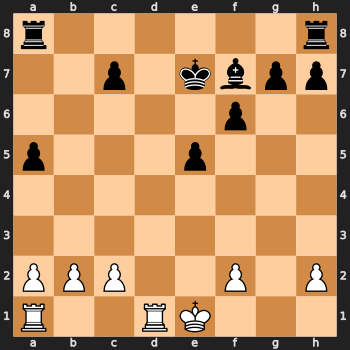

In [11]:
import chess
import chess.svg
from IPython.display import display, clear_output
import time

# List of FEN strings for each move
fens = [
    "rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR",
    "rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR",
    "rnbqkbnr/ppp1pppp/8/3p4/4P3/8/PPPP1PPP/RNBQKBNR",
    "rnbqkbnr/ppp1pppp/8/3P4/8/8/PPPP1PPP/RNBQKBNR",
    "rnb1kbnr/ppp1pppp/8/3q4/8/8/PPPP1PPP/RNBQKBNR",
    "rnb1kbnr/ppp1pppp/8/1B1q4/8/8/PPPP1PPP/RNBQK1NR",
    "rnb1kbnr/ppp1pppp/8/1q6/8/8/PPPP1PPP/RNBQK1NR",
    "rnb1kbnr/ppp1pppp/8/1q6/3P4/8/PPP2PPP/RNBQK1NR",
    "rnb1kbnr/p1p1pppp/1p6/1q6/3P4/8/PPP2PPP/RNBQK1NR",
    "rnb1kbnr/p1p1pppp/1p6/1q6/3P4/5Q2/PPP2PPP/RNB1K1NR",
    "r1b1kbnr/p1p1pppp/1pn5/1q6/3P4/5Q2/PPP2PPP/RNB1K1NR",
    "r1b1kbnr/p1p1pppp/1pn5/1q6/3P4/5Q2/PPP1NPPP/RNB1K2R",
    "r3kbnr/pbp1pppp/1pn5/1q6/3P4/5Q2/PPP1NPPP/RNB1K2R",
    "r3kbnr/pbp1pppp/1pn5/1q1P4/8/5Q2/PPP1NPPP/RNB1K2R",
    "r3kbnr/pbp1pppp/1p6/1q1Pn3/8/5Q2/PPP1NPPP/RNB1K2R",
    "r3kbnr/pbp1pppp/1p6/1q1Pn3/5Q2/8/PPP1NPPP/RNB1K2R",
    "r3kbnr/pbp1p1pp/1p3p2/1q1Pn3/5Q2/8/PPP1NPPP/RNB1K2R",
    "r3kbnr/pbp1p1pp/1p3p2/1q1Pn3/4Q3/8/PPP1NPPP/RNB1K2R",
    "r3kbnr/pbp1p1pp/1p3p2/3qn3/4Q3/8/PPP1NPPP/RNB1K2R",
    "r3kbnr/pbp1p1pp/1p3p2/3Qn3/8/8/PPP1NPPP/RNB1K2R",
    "r3kbnr/p1p1p1pp/1p3p2/3bn3/8/8/PPP1NPPP/RNB1K2R",
    "r3kbnr/p1p1p1pp/1p3p2/3bn3/3N4/8/PPP2PPP/RNB1K2R",
    "r3kbnr/p1p1p1pp/1p3p2/4n3/3N4/8/PPP2PbP/RNB1K2R",
    "r3kbnr/p1p1p1pp/1p3p2/4n3/3N4/8/PPP2PbP/RNB1K1R1",
    "r3kbnr/p1p1p1pp/1p3p2/8/3N4/5n2/PPP2PbP/RNB1K1R1",
    "r3kbnr/p1p1p1pp/1p3p2/8/8/5N2/PPP2PbP/RNB1K1R1",
    "r3kbnr/p1p1p1pp/1p3p2/8/8/5b2/PPP2P1P/RNB1K1R1",
    "r3kbnr/p1p1p1pp/1p3p2/8/8/5bR1/PPP2P1P/RNB1K3",
    "r3kbnr/p1p1p1pp/1p3p2/3b4/8/6R1/PPP2P1P/RNB1K3",
    "r3kbnr/p1p1p1pp/1p3p2/3b4/8/3R4/PPP2P1P/RNB1K3",
    "r3kbnr/p1p1p1pp/1p3p2/8/2b5/3R4/PPP2P1P/RNB1K3",
    "r3kbnr/p1p1p1pp/1p3p2/8/2b5/8/PPP2P1P/RNBRK3",
    "r3kbnr/p1p3pp/1p3p2/4p3/2b5/8/PPP2P1P/RNBRK3",
    "r3kbnr/p1p3pp/1p3p2/4p3/2b5/4B3/PPP2P1P/RN1RK3",
    "r3k1nr/p1p3pp/1p3p2/4p3/1bb5/4B3/PPP2P1P/RN1RK3",
    "r3k1nr/p1p3pp/1p3p2/4p3/1bb5/8/PPPB1P1P/RN1RK3",
    "r3k1nr/p1p3pp/1p3p2/b3p3/2b5/8/PPPB1P1P/RN1RK3",
    "r3k1nr/p1p3pp/1p3p2/B3p3/2b5/8/PPP2P1P/RN1RK3",
    "r3k1nr/p1p3pp/5p2/p3p3/2b5/8/PPP2P1P/RN1RK3",
    "r3k1nr/p1p3pp/5p2/p3p3/2b5/N7/PPP2P1P/R2RK3",
    "r3k1nr/p1p2bpp/5p2/p3p3/8/N7/PPP2P1P/R2RK3",
    "r3k1nr/p1p2bpp/5p2/pN2p3/8/8/PPP2P1P/R2RK3",
    "2r1k1nr/p1p2bpp/5p2/pN2p3/8/8/PPP2P1P/R2RK3",
    "2r1k1nr/N1p2bpp/5p2/p3p3/8/8/PPP2P1P/R2RK3",
    "r3k1nr/N1p2bpp/5p2/p3p3/8/8/PPP2P1P/R2RK3",
    "r3k1nr/2p2bpp/2N2p2/p3p3/8/8/PPP2P1P/R2RK3",
    "r3k2r/2p1nbpp/2N2p2/p3p3/8/8/PPP2P1P/R2RK3",
    "r3k2r/2p1Nbpp/5p2/p3p3/8/8/PPP2P1P/R2RK3",
    "r6r/2p1kbpp/5p2/p3p3/8/8/PPP2P1P/R2RK3",
]

# Iterate over FEN strings and display the board for each
for fen in fens:
    board = chess.Board(fen)
    clear_output(wait=True)
    display(chess.svg.board(board=board, size=350))
    time.sleep(0.5)  # Adjust time delay as needed

# To keep the last board displayed
clear_output(wait=True)
display(chess.svg.board(board=board, size=350))


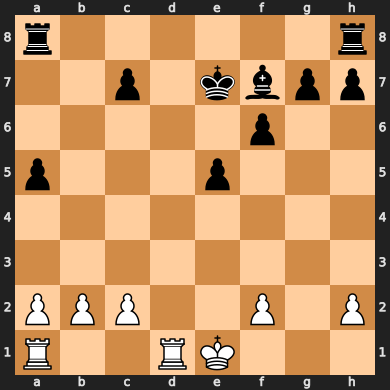

In [10]:
# rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR
# rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR
# rnbqkbnr/ppp1pppp/8/3p4/4P3/8/PPPP1PPP/RNBQKBNR
# rnbqkbnr/ppp1pppp/8/3P4/8/8/PPPP1PPP/RNBQKBNR
# rnb1kbnr/ppp1pppp/8/3q4/8/8/PPPP1PPP/RNBQKBNR
# rnb1kbnr/ppp1pppp/8/1B1q4/8/8/PPPP1PPP/RNBQK1NR
# rnb1kbnr/ppp1pppp/8/1q6/8/8/PPPP1PPP/RNBQK1NR
# rnb1kbnr/ppp1pppp/8/1q6/3P4/8/PPP2PPP/RNBQK1NR
# rnb1kbnr/p1p1pppp/1p6/1q6/3P4/8/PPP2PPP/RNBQK1NR
# rnb1kbnr/p1p1pppp/1p6/1q6/3P4/5Q2/PPP2PPP/RNB1K1NR
# r1b1kbnr/p1p1pppp/1pn5/1q6/3P4/5Q2/PPP2PPP/RNB1K1NR
# r1b1kbnr/p1p1pppp/1pn5/1q6/3P4/5Q2/PPP1NPPP/RNB1K2R
# r3kbnr/pbp1pppp/1pn5/1q6/3P4/5Q2/PPP1NPPP/RNB1K2R
# r3kbnr/pbp1pppp/1pn5/1q1P4/8/5Q2/PPP1NPPP/RNB1K2R
# r3kbnr/pbp1pppp/1p6/1q1Pn3/8/5Q2/PPP1NPPP/RNB1K2R
# r3kbnr/pbp1pppp/1p6/1q1Pn3/5Q2/8/PPP1NPPP/RNB1K2R
# r3kbnr/pbp1p1pp/1p3p2/1q1Pn3/5Q2/8/PPP1NPPP/RNB1K2R
# r3kbnr/pbp1p1pp/1p3p2/1q1Pn3/4Q3/8/PPP1NPPP/RNB1K2R
# r3kbnr/pbp1p1pp/1p3p2/3qn3/4Q3/8/PPP1NPPP/RNB1K2R
# r3kbnr/pbp1p1pp/1p3p2/3Qn3/8/8/PPP1NPPP/RNB1K2R
# r3kbnr/p1p1p1pp/1p3p2/3bn3/8/8/PPP1NPPP/RNB1K2R
# r3kbnr/p1p1p1pp/1p3p2/3bn3/3N4/8/PPP2PPP/RNB1K2R
# r3kbnr/p1p1p1pp/1p3p2/4n3/3N4/8/PPP2PbP/RNB1K2R
# r3kbnr/p1p1p1pp/1p3p2/4n3/3N4/8/PPP2PbP/RNB1K1R1
# r3kbnr/p1p1p1pp/1p3p2/8/3N4/5n2/PPP2PbP/RNB1K1R1
# r3kbnr/p1p1p1pp/1p3p2/8/8/5N2/PPP2PbP/RNB1K1R1
# r3kbnr/p1p1p1pp/1p3p2/8/8/5b2/PPP2P1P/RNB1K1R1
# r3kbnr/p1p1p1pp/1p3p2/8/8/5bR1/PPP2P1P/RNB1K3
# r3kbnr/p1p1p1pp/1p3p2/3b4/8/6R1/PPP2P1P/RNB1K3
# r3kbnr/p1p1p1pp/1p3p2/3b4/8/3R4/PPP2P1P/RNB1K3
# r3kbnr/p1p1p1pp/1p3p2/8/2b5/3R4/PPP2P1P/RNB1K3
# r3kbnr/p1p1p1pp/1p3p2/8/2b5/8/PPP2P1P/RNBRK3
# r3kbnr/p1p3pp/1p3p2/4p3/2b5/8/PPP2P1P/RNBRK3
# r3kbnr/p1p3pp/1p3p2/4p3/2b5/4B3/PPP2P1P/RN1RK3
# r3k1nr/p1p3pp/1p3p2/4p3/1bb5/4B3/PPP2P1P/RN1RK3
# r3k1nr/p1p3pp/1p3p2/4p3/1bb5/8/PPPB1P1P/RN1RK3
# r3k1nr/p1p3pp/1p3p2/b3p3/2b5/8/PPPB1P1P/RN1RK3
# r3k1nr/p1p3pp/1p3p2/B3p3/2b5/8/PPP2P1P/RN1RK3
# r3k1nr/p1p3pp/5p2/p3p3/2b5/8/PPP2P1P/RN1RK3
# r3k1nr/p1p3pp/5p2/p3p3/2b5/N7/PPP2P1P/R2RK3
# r3k1nr/p1p2bpp/5p2/p3p3/8/N7/PPP2P1P/R2RK3
# r3k1nr/p1p2bpp/5p2/pN2p3/8/8/PPP2P1P/R2RK3
# 2r1k1nr/p1p2bpp/5p2/pN2p3/8/8/PPP2P1P/R2RK3
# 2r1k1nr/N1p2bpp/5p2/p3p3/8/8/PPP2P1P/R2RK3
# r3k1nr/N1p2bpp/5p2/p3p3/8/8/PPP2P1P/R2RK3
# r3k1nr/2p2bpp/2N2p2/p3p3/8/8/PPP2P1P/R2RK3
# r3k2r/2p1nbpp/2N2p2/p3p3/8/8/PPP2P1P/R2RK3
# r3k2r/2p1Nbpp/5p2/p3p3/8/8/PPP2P1P/R2RK3
# r6r/2p1kbpp/5p2/p3p3/8/8/PPP2P1P/R2RK3

# Your FEN string
fen = "r6r/2p1kbpp/5p2/p3p3/8/8/PPP2P1P/R2RK3"

# Create a board from the FEN
board = chess.Board(fen)

# Print the board
board

Queenside castling not possible in the current position.


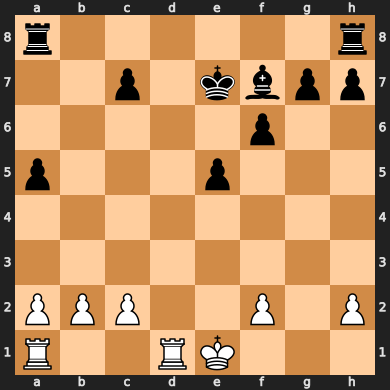

In [9]:
# Make the queenside castling move for white
# In python-chess, the queenside castling for white is represented as "e1c1"
move = chess.Move.from_uci("e1c1")

# Check if the move is legal and make the move
if move in board.legal_moves:
    board.push(move)
else:
    print("Queenside castling not possible in the current position.")

# Display the board
board
